In [150]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Loading the Data

In [151]:
# Use pathlib to define file paths
base_dir = Path("d:/GitHub/IFT6390BKaggle2")  # Set your project base directory
train_file_path = base_dir / "Data" / "train_data.pkl"
test_file_path = base_dir / "Data" / "test_data.pkl"

In [152]:
# Load the pickle file
with open(train_file_path, 'rb') as f:
    train_data = pickle.load(f)


X_data = np.array(train_data['images'])  # Convert to NumPy array
y_data = np.array(train_data['labels'])  # Convert to NumPy array

with open(test_file_path, 'rb') as g:
    test_data = pickle.load(g)

# Access images and labels
X_test_data = np.array(test_data['images'])  # Convert to NumPy array


In [153]:
# Print basic information
print("Shape of images:", X_data.shape)  # Expected: (N, 28, 28)
print("Number of labels:", len(y_data))  # Expected: N
print("Unique labels:", np.unique(y_data))

print(X_test_data.shape)


Shape of images: (97477, 28, 28)
Number of labels: 97477
Unique labels: [0 1 2 3]
(1000, 28, 28)


In [154]:
X = X_data
y = y_data

# Split to validation set

In [155]:
def train_val_split(X, y, val_ratio=0.2, random_seed=None):

    if random_seed is not None:
        np.random.seed(random_seed)
    
    data_size = X.shape[0]

    # Generate a permutation of indices
    indices = np.random.permutation(data_size)

    # Compute the split point
    split_point = int((1 - val_ratio) * data_size)

    # Split indices for training and validation
    train_indices = indices[:split_point]
    val_indices = indices[split_point:]

    # Use indices to split the data
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_val = X[val_indices]
    y_val = y[val_indices]

    return X_train, y_train, X_val, y_val

# Visualization

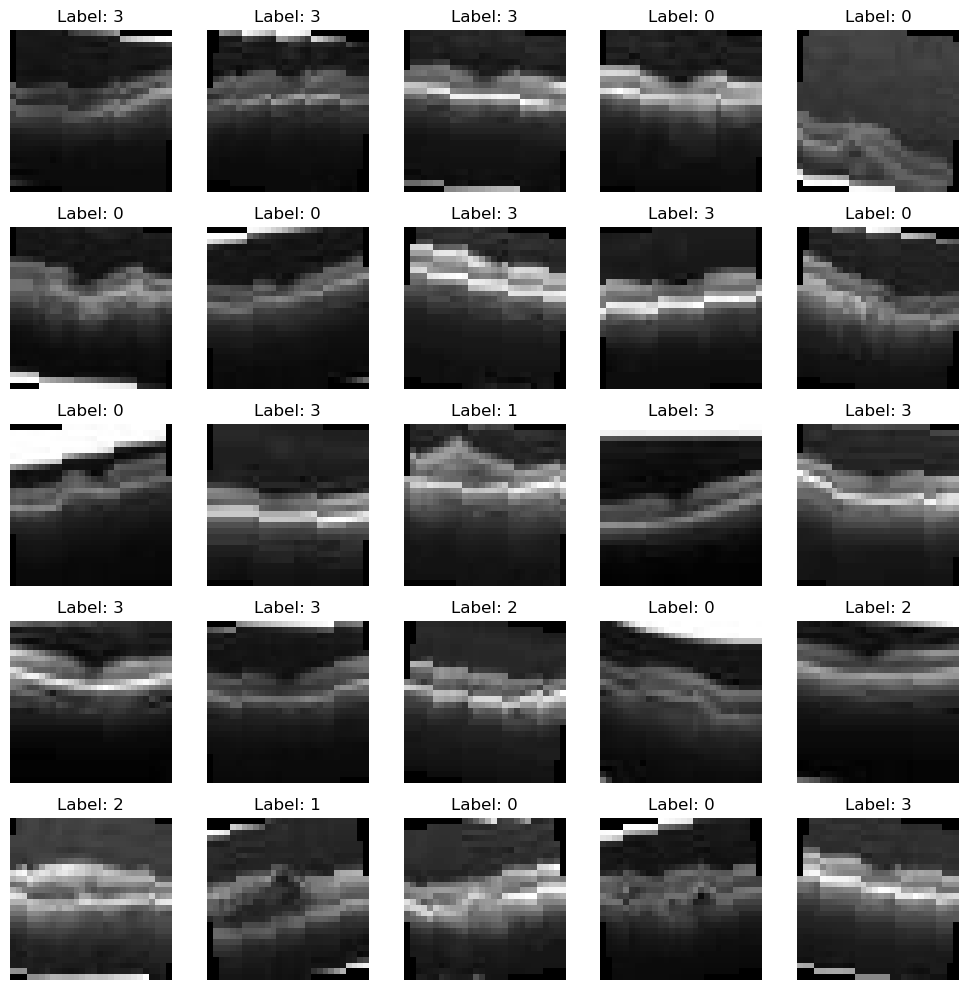

In [156]:
def display_sample_images(X, y=None, num_samples=25):
    """
    Display a grid of random sample images from the dataset.
    X: numpy array of shape (N, 28, 28)
    y: labels corresponding to X (optional)
    num_samples: total images to display
    """
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        idx = np.random.randint(0, X.shape[0])
        plt.subplot(int(num_samples**0.5), int(num_samples**0.5), i + 1)
        plt.imshow(X[idx], cmap='gray')
        if y is not None:
            plt.title(f"Label: {y[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display 25 random samples
display_sample_images(X, y, num_samples=25)

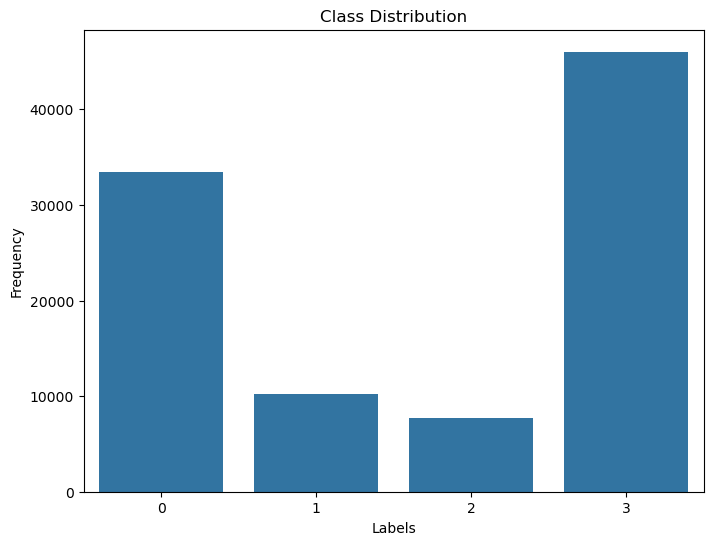

In [157]:
def plot_class_distribution(labels):
    """
    Plot the distribution of labels.
    """
    plt.figure(figsize=(8, 6))
    sns.countplot(x=labels)
    plt.title("Class Distribution")
    plt.xlabel("Labels")
    plt.ylabel("Frequency")
    plt.show()

# Plot class distribution
plot_class_distribution(y)

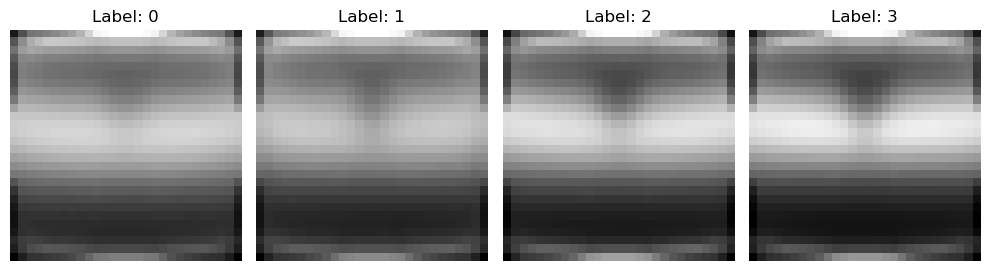

In [158]:
def visualize_average_image_per_class(X, y):
    """
    Compute and visualize the average image for each class.
    """
    unique_labels = np.unique(y)
    plt.figure(figsize=(10, 5))
    for i, label in enumerate(unique_labels):
        avg_image = X[y == label].mean(axis=0)  # Compute average image
        plt.subplot(1, len(unique_labels), i + 1)
        plt.imshow((avg_image), cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Compute and visualize average images
visualize_average_image_per_class(X, y)

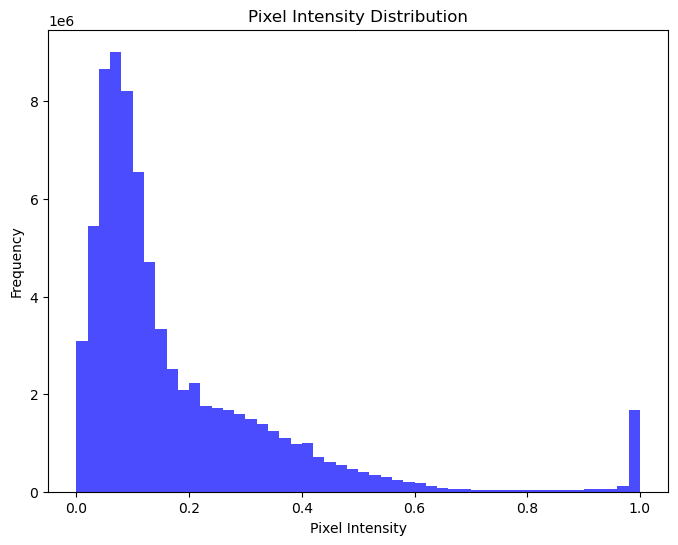

In [159]:
def plot_pixel_intensity_distribution(X):
    """
    Plot the distribution of pixel intensities across all images.
    """
    plt.figure(figsize=(8, 6))
    pixel_values = X.flatten()  # Flatten all images into a 1D array
    plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Plot pixel intensity distribution
plot_pixel_intensity_distribution(X)

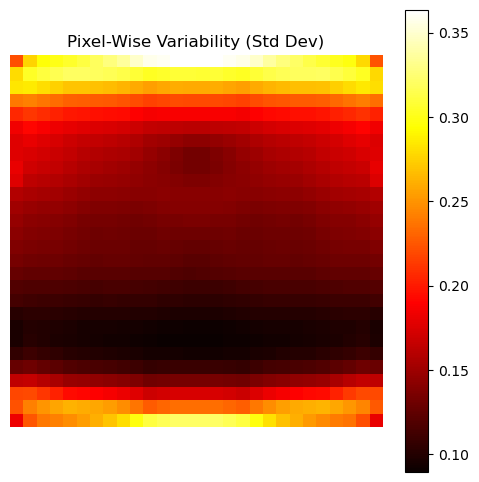

In [160]:
def visualize_pixel_variability(X):
    """
    Compute and visualize the pixel-wise standard deviation.
    """
    pixel_std = X.std(axis=0)  # Compute pixel-wise standard deviation
    plt.figure(figsize=(6, 6))
    plt.imshow(pixel_std, cmap='hot')
    plt.colorbar()
    plt.title("Pixel-Wise Variability (Std Dev)")
    plt.axis('off')
    plt.show()

# Visualize pixel variability
visualize_pixel_variability(X)

In [161]:
def calculate_pixel_label_correlation(X, y):
    """
    Calculate the correlation between each pixel value and the classification label.

    Parameters:
    - X: numpy array of shape (N, 28, 28), where N is the number of samples.
    - y: numpy array of shape (N,), classification labels.

    Returns:
    - correlation_grid: numpy array of shape (28, 28), containing the correlation for each pixel.
    """
    # Flatten the images into vectors of shape (N, 784)
    X_flat = X.reshape(X.shape[0], -1)  # Shape becomes (N, 784)
    
    # Initialize a correlation grid
    correlation_grid = np.zeros((28, 28))
    
    # Calculate the correlation for each pixel
    for i in range(28):
        for j in range(28):
            # Extract the pixel values at position (i, j) across all samples
            pixel_values = X[:, i, j]
            
            # Compute the correlation coefficient between pixel values and labels
            correlation = np.corrcoef(pixel_values, y)[0, 1]
            correlation_grid[i, j] = correlation
    
    return correlation_grid
corr = calculate_pixel_label_correlation(X,y)
print(corr.shape)

(28, 28)


## Flatten the Data for for further visualization

In [162]:
# Assume X_train is of shape (N, 28, 28)
N = X.shape[0]  # Number of samples

# Reshape the array to (N, 784)
X_train_reshaped = X.reshape(N, 28 * 28)

# Print the new shape
print("Reshaped X_train shape:", X_train_reshaped.shape)  # Expected: (N, 784)

Reshaped X_train shape: (97477, 784)


In [163]:
X_train_reshaped

array([[0.        , 0.        , 0.08627451, ..., 0.1254902 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.10980392, ..., 0.05490196, 0.        ,
        0.        ],
       [0.6745098 , 0.65882355, 0.6313726 , ..., 0.04313726, 0.04313726,
        0.04313726],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10980392, 0.10588235, 0.10980392, ..., 0.03921569, 0.03921569,
        0.03529412],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

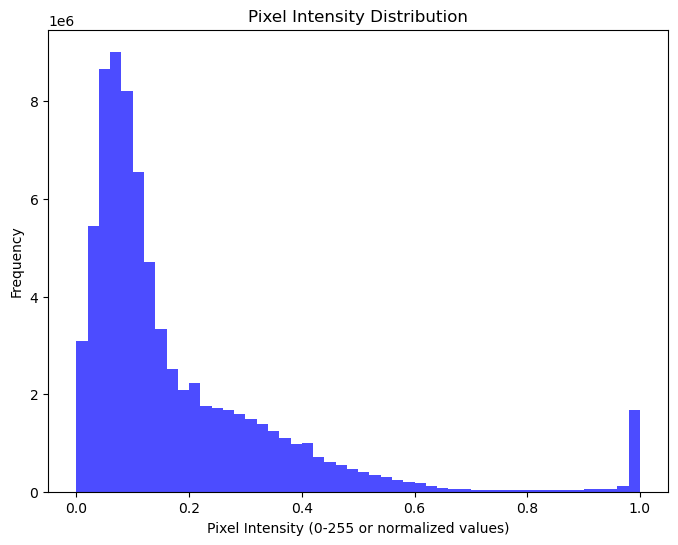

In [164]:
def plot_pixel_intensity_distribution(X_flat):
    """
    Plot the distribution of pixel intensities for the entire dataset.
    """
    plt.figure(figsize=(8, 6))
    plt.hist(X_flat.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity (0-255 or normalized values)")
    plt.ylabel("Frequency")
    plt.show()

# Call the function
plot_pixel_intensity_distribution(X_train_reshaped)

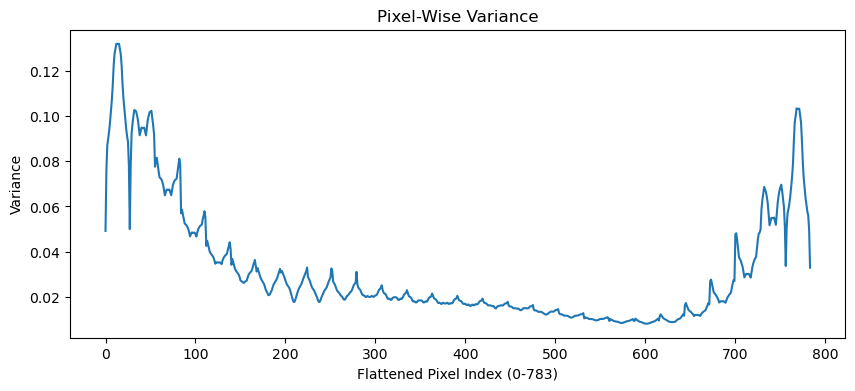

In [165]:
def plot_pixel_variance(X_flat):
    """
    Plot the pixel-wise variance across all samples.
    """
    pixel_variances = X_flat.var(axis=0)  # Variance for each of the 784 pixels
    plt.figure(figsize=(10, 4))
    plt.plot(pixel_variances)
    plt.title("Pixel-Wise Variance")
    plt.xlabel("Flattened Pixel Index (0-783)")
    plt.ylabel("Variance")
    plt.show()

# Call the function
plot_pixel_variance(X_train_reshaped)


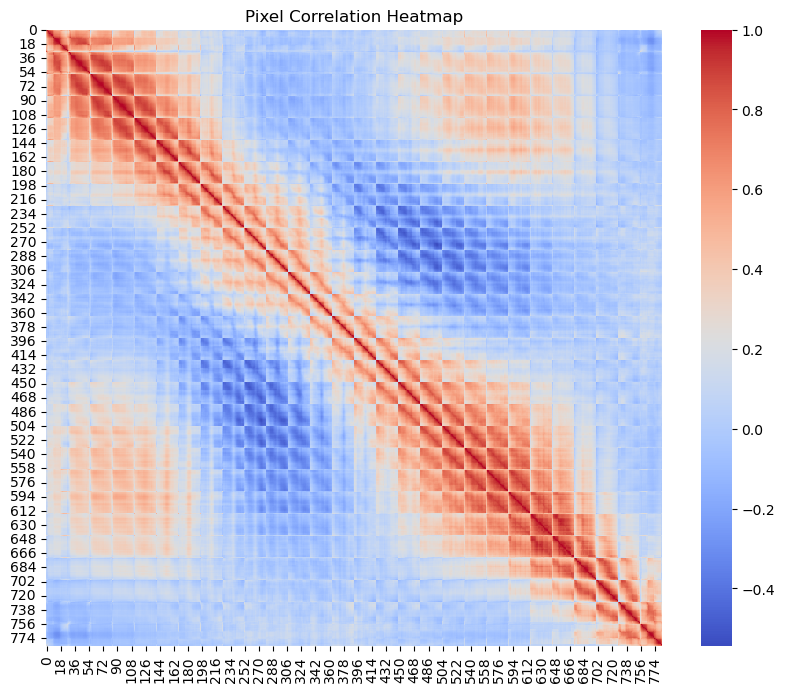

In [166]:
import seaborn as sns

def plot_pixel_correlation_heatmap(X_flat, sample_size=500):
    """
    Plot a correlation heatmap for pixel values.
    Use a smaller sample size to make computation feasible.
    """
    sample_data = X_flat[:sample_size]  # Take a smaller subset for efficiency
    pixel_correlations = np.corrcoef(sample_data.T)  # Correlation matrix of pixels

    plt.figure(figsize=(10, 8))
    sns.heatmap(pixel_correlations, cmap="coolwarm", square=True)
    plt.title("Pixel Correlation Heatmap")
    plt.show()

# Call the function
plot_pixel_correlation_heatmap(X_train_reshaped, sample_size=500)


# Feature Selection

In [167]:
## This part was not used at all in the end

In [168]:
def undersample_data(X, y):
    # Identify unique classes and their counts
    unique_classes, class_counts = np.unique(y, return_counts=True)
    print(f"Class counts before undersampling: {dict(zip(unique_classes, class_counts))}")
    
    # Find the smallest class size
    min_class_size = np.min(class_counts)
    
    # Initialize lists to store undersampled data
    X_undersampled = []
    y_undersampled = []
    
    # Iterate through each class and undersample
    for cls in unique_classes:
        # Get indices of the current class
        class_indices = np.where(y == cls)[0]
        
        # Randomly select samples equal to the minimum class size
        undersampled_indices = np.random.choice(class_indices, size=min_class_size, replace=False)
        
        # Append the undersampled data
        X_undersampled.append(X[undersampled_indices])
        y_undersampled.append(y[undersampled_indices])
    
    # Combine all undersampled data
    X_undersampled = np.vstack(X_undersampled)
    y_undersampled = np.concatenate(y_undersampled)
    
    # Shuffle the undersampled data
    shuffled_indices = np.random.permutation(len(y_undersampled))
    X_undersampled = X_undersampled[shuffled_indices]
    y_undersampled = y_undersampled[shuffled_indices]
    
    print(f"Class counts after undersampling: {np.unique(y_undersampled, return_counts=True)}")
    
    return X_undersampled, y_undersampled


In [169]:
def flatten_images(X_train):

    # Get the number of samples in each dataset
    N_train = X_train.shape[0]
    
    # Flatten the images while preserving the batch dimension
    X_train_flat = X_train.reshape(N_train, -1)

    
    return X_train_flat


In [170]:
def train_val_split(X, y, val_ratio=0.2, random_seed=None):

    if random_seed is not None:
        np.random.seed(random_seed)
    
    data_size = X.shape[0]

    # Generate a permutation of indices
    indices = np.random.permutation(data_size)

    # Compute the split point
    split_point = int((1 - val_ratio) * data_size)

    # Split indices for training and validation
    train_indices = indices[:split_point]
    val_indices = indices[split_point:]

    # Use indices to split the data
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_val = X[val_indices]
    y_val = y[val_indices]

    return X_train, y_train, X_val, y_val

In [171]:
X_train, y_train, X_val, y_val =   train_val_split(flatten_images(X_data), y_data, val_ratio=0.2, random_seed=42)
X_train_undersampled, y_train_undersampled = undersample_data(X_train, y_train)

Class counts before undersampling: {0: 26847, 1: 8148, 2: 6207, 3: 36779}
Class counts after undersampling: (array([0, 1, 2, 3]), array([6207, 6207, 6207, 6207], dtype=int64))


In [172]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(77981, 784) (77981,) (19496, 784) (19496,)


In [173]:
X_test_flatten = flatten_images(X_test_data)

# Convolutional Neural Network

## Functions for the CNM

In [174]:
def conv2d(X, kernel):
    """
    Perform a 2D convolution.
    
    Parameters:
        X: Input array (H, W)
        kernel: Kernel array (kH, kW)
        
    Returns:
        Output array after convolution.
    """
    H, W = X.shape
    kH, kW = kernel.shape
    output_h, output_w = H - kH + 1, W - kW + 1
    
    output = np.zeros((output_h, output_w))
    for i in range(output_h):
        for j in range(output_w):
            region = X[i:i+kH, j:j+kW]
            output[i, j] = np.sum(region * kernel)
    return output

def max_pooling(X, pool_size=2, stride=2):
    """
    Perform max pooling.
    
    Parameters:
        X: Input array (H, W)
        pool_size: Size of the pooling window.
        stride: Stride size.
        
    Returns:
        Downsampled output.
    """
    H, W = X.shape
    output_h = (H - pool_size) // stride + 1
    output_w = (W - pool_size) // stride + 1
    
    output = np.zeros((output_h, output_w))
    for i in range(0, H - pool_size + 1, stride):
        for j in range(0, W - pool_size + 1, stride):
            region = X[i:i+pool_size, j:j+pool_size]
            output[i//stride, j//stride] = np.max(region)
    return output


def relu(X):
    """
    Apply ReLU activation function.
    """
    return np.maximum(0, X)
def flatten(X):
    """
    Flatten a 2D array into 1D.
    """
    return X.flatten()
    
def dense(X, weights, biases):
    """
    Fully connected layer.
    
    Parameters:
        X: Input array (n_features,)
        weights: Weight matrix (n_features, n_outputs)
        biases: Bias vector (n_outputs,)
        
    Returns:
        Output after linear transformation.
    """
    return np.dot(X, weights) + biases
    
def softmax(X):
    """
    Apply softmax function to an array.
    """
    exp_X = np.exp(X - np.max(X))  # Stabilize by subtracting max
    return exp_X / np.sum(exp_X)


def forward_pass(X, params, dropout_rate=0.5):
    cache = {}

    # Convolution + Batch Normalization + ReLU
    conv1 = relu(batch_normalize(conv2d(X, params['conv1_kernel']), 
                                 params['conv1_gamma'], params['conv1_beta']))
    assert len(conv1.shape) == 2, f"Unexpected conv1 shape: {conv1.shape}"
    cache['conv1'] = conv1

    # Max Pooling + Dropout
    pool1 = dropout(max_pooling(conv1), dropout_rate)
    cache['pool1'] = pool1

    # Flatten
    flat = flatten(pool1)
    cache['flat'] = flat

    # Fully Connected Layer 1 + Batch Normalization + ReLU
    fc1 = relu(batch_normalize(dense(flat, params['fc1_weights'], params['fc1_biases']),
                               params['fc1_gamma'], params['fc1_beta']))
    assert fc1.shape[0] == 64, f"Unexpected fc1 shape: {fc1.shape}"
    cache['fc1'] = fc1

    # Dropout after first dense layer
    fc1_dropout = dropout(fc1, dropout_rate)
    cache['fc1_dropout'] = fc1_dropout

    # Fully Connected Layer 2 + ReLU
    fc2 = relu(dense(fc1_dropout, params['fc2_weights'], params['fc2_biases']))
    assert fc2.shape[0] == 32, f"Unexpected fc2 shape: {fc2.shape}"
    cache['fc2'] = fc2

    # Output Layer (Logits)
    logits = dense(fc2, params['output_weights'], params['output_biases'])
    assert logits.shape[0] == 10, f"Unexpected logits shape: {logits.shape}"
    cache['logits'] = logits

    return logits, cache

    
def cross_entropy_loss(logits, y):
    """
    Compute the Cross-Entropy Loss using logits.
    
    Parameters:
        logits: Logits from the model (n_classes,).
        y: True label (scalar).
    
    Returns:
        loss: Cross-Entropy Loss for the given sample.
    """
    # Stabilize logits by subtracting the maximum value (to prevent large exponentials)
    logits = logits - np.max(logits)
    # Calculate log probabilities
    log_probs = logits - np.log(np.sum(np.exp(logits)))
    # Compute the loss for the true class
    loss = -log_probs[y]
    return loss

def cross_entropy_loss_over_set(X, y, params):
    """
    Compute the cross-entropy loss over a dataset.

    Parameters:
        X: Input data (n_samples, H, W).
        y: Ground-truth labels (n_samples,).
        params: Dictionary of weights and biases.

    Returns:
        loss: Average cross-entropy loss for the dataset.
    """
    total_loss = 0
    for i, X_sample in enumerate(X):
        logits, cache = forward_pass(X_sample, params)
        output = softmax(logits)
        total_loss += -np.log(output[y[i]])
    return total_loss / len(X)


def dense_backward(d_out, input, weights):
    """
    Backward pass for a fully connected (dense) layer.
    
    Parameters:
        d_out: Gradient of the loss with respect to the output (n_outputs,).
        input: Input to the dense layer (n_features,).
        weights: Weights of the dense layer (n_features, n_outputs).
    
    Returns:
        d_input: Gradient of the loss with respect to the input.
        d_weights: Gradient of the loss with respect to the weights.
        d_biases: Gradient of the loss with respect to the biases.
    """
    d_input = np.dot(d_out, weights.T)
    d_weights = np.outer(input, d_out)
    d_biases = d_out
    return d_input, d_weights, d_biases

def relu_backward(d_out, input):
    """
    Backward pass for ReLU activation.
    
    Parameters:
        d_out: Gradient of the loss with respect to the output.
        input: Input to the ReLU function.
    
    Returns:
        d_input: Gradient of the loss with respect to the input.
    """
    d_input = d_out * (input > 0)  # Gradient is 1 where input > 0, otherwise 0
    return d_input

def max_pooling_backward(d_out, input, pool_size=2, stride=2):
    """
    Backward pass for max pooling.
    
    Parameters:
        d_out: Gradient of the loss with respect to the pooled output.
        input: Input to the pooling layer.
        pool_size: Size of the pooling window.
        stride: Stride size.
    
    Returns:
        d_input: Gradient of the loss with respect to the input.
    """
    H, W = input.shape
    d_input = np.zeros_like(input)
    output_h, output_w = d_out.shape

    for i in range(output_h):
        for j in range(output_w):
            # Get the pooling region
            pool_region = input[i*stride:i*stride+pool_size, j*stride:j*stride+pool_size]
            max_val = np.max(pool_region)
            
            # Distribute the gradient only to the max value location
            for m in range(pool_size):
                for n in range(pool_size):
                    if pool_region[m, n] == max_val:
                        d_input[i*stride+m, j*stride+n] = d_out[i, j]
    return d_input

def conv2d_backward(d_out, input, kernel):
    """
    Backward pass for a convolutional layer.
    
    Parameters:
        d_out: Gradient of the loss with respect to the output (H_out, W_out).
        input: Input to the convolutional layer (H, W).
        kernel: Convolutional kernel (kH, kW).
    
    Returns:
        d_input: Gradient of the loss with respect to the input.
        d_kernel: Gradient of the loss with respect to the kernel.
    """
    H, W = input.shape
    kH, kW = kernel.shape
    d_input = np.zeros_like(input)
    d_kernel = np.zeros_like(kernel)
    
    H_out, W_out = d_out.shape
    for i in range(H_out):
        for j in range(W_out):
            region = input[i:i+kH, j:j+kW]
            d_kernel += region * d_out[i, j]
            d_input[i:i+kH, j:j+kW] += kernel * d_out[i, j]
    return d_input, d_kernel

def batch_normalization_backward(d_out, input, gamma, beta, epsilon=1e-5):
    """
    Backward pass for batch normalization.

    Parameters:
        d_out: Gradient of the loss with respect to the output.
        input: Input to the batch normalization layer.
        gamma: Scaling factor for normalization.
        beta: Shift factor for normalization.
        epsilon: Small constant for numerical stability.

    Returns:
        d_input: Gradient of the loss with respect to the input.
        d_gamma: Gradient of the loss with respect to gamma.
        d_beta: Gradient of the loss with respect to beta.
    """
    mean = np.mean(input, axis=0)
    variance = np.var(input, axis=0)
    normalized = (input - mean) / np.sqrt(variance + epsilon)

    d_gamma = np.sum(d_out * normalized, axis=0)
    d_beta = np.sum(d_out, axis=0)

    d_normalized = d_out * gamma
    d_variance = np.sum(d_normalized * (input - mean) * -0.5 * (variance + epsilon)**(-1.5), axis=0)
    d_mean = np.sum(d_normalized * -1 / np.sqrt(variance + epsilon), axis=0) + \
             d_variance * np.mean(-2 * (input - mean), axis=0)

    d_input = d_normalized / np.sqrt(variance + epsilon) + d_variance * 2 * (input - mean) / input.shape[0] + d_mean / input.shape[0]

    return d_input, d_gamma, d_beta


def backprop(X, y, logits, params, cache, dropout_rate=0.3):
    """
    Perform backpropagation for the updated CNN.

    Parameters:
        X: Input image (H, W).
        y: True label (scalar).
        logits: Logits from the final layer.
        params: Dictionary of weights and biases.
        cache: Intermediate values from the forward pass.
        dropout_rate: Probability of dropping units.

    Returns:
        grads: Gradients for all parameters in the model.
    """
    grads = {}

    # Gradient of Cross-Entropy Loss with respect to logits
    d_logits = np.exp(logits - np.max(logits)) / np.sum(np.exp(logits - np.max(logits)))
    d_logits[y] -= 1  # Subtract 1 for the true class

    # Dense Layer 2 (Output Layer)
    d_fc2, grads['output_weights'], grads['output_biases'] = dense_backward(
        d_logits, cache['fc2'], params['output_weights']
    )

    # Fully Connected Layer 2
    d_fc2_relu = relu_backward(d_fc2, cache['fc2'])
    d_fc1_dropout, grads['fc2_weights'], grads['fc2_biases'] = dense_backward(
        d_fc2_relu, cache['fc1_dropout'], params['fc2_weights']
    )

    # Apply Dropout Mask to Gradients
    d_fc1 = d_fc1_dropout * (np.random.rand(*cache['fc1'].shape) > dropout_rate)

    # Fully Connected Layer 1
    d_fc1_relu = relu_backward(d_fc1, cache['fc1'])
    d_flat, grads['fc1_weights'], grads['fc1_biases'] = dense_backward(
        d_fc1_relu, cache['flat'], params['fc1_weights']
    )

    # Max Pooling
    d_pool1 = max_pooling_backward(d_flat.reshape(cache['pool1'].shape), cache['conv1'])

    # Convolutional Layer
    d_conv1, grads['conv1_kernel'] = conv2d_backward(d_pool1, X, params['conv1_kernel'])

    # Batch Normalization Gradients (if applicable)
    d_pool1, grads['conv1_gamma'], grads['conv1_beta'] = batch_normalization_backward(
        d_pool1, cache['conv1'], params['conv1_gamma'], params['conv1_beta']
    )
    d_fc1_relu, grads['fc1_gamma'], grads['fc1_beta'] = batch_normalization_backward(
        d_fc1_relu, cache['fc1'], params['fc1_gamma'], params['fc1_beta']
    )

    return grads



def batch_normalize(inputs, gamma=None, beta=None, epsilon=1e-5):
    """
    Perform batch normalization.

    Parameters:
        inputs: Input data to normalize.
        gamma: Scaling factor (learnable).
        beta: Shift factor (learnable).
        epsilon: Small constant for numerical stability.

    Returns:
        Normalized data.
    """
    mean = np.mean(inputs, axis=0, keepdims=True)
    variance = np.var(inputs, axis=0, keepdims=True)
    normalized = (inputs - mean) / np.sqrt(variance + epsilon)
    if gamma is not None and beta is not None:
        normalized = gamma * normalized + beta
    return normalized

def dropout(inputs, dropout_rate):
    """
    Apply dropout to inputs.

    Parameters:
        inputs: Input data to apply dropout to.
        dropout_rate: Probability of dropping units.

    Returns:
        Output with dropout applied.
    """
    mask = (np.random.rand(*inputs.shape) > dropout_rate).astype(float)
    return inputs * mask / (1.0 - dropout_rate)

In [175]:
def train(X_train, y_train, X_val, y_val, params, epochs, learning_rate, dropout_rate=0.5):
    """
    Train the CNN using gradient descent with architectural improvements.

    Parameters:
        X_train: Training data (n_samples, H, W).
        y_train: Labels (n_samples,).
        X_val: Validation data (n_samples, H, W).
        y_val: Validation labels (n_samples,).
        params: Dictionary of weights and biases.
        epochs: Number of training epochs.
        learning_rate: Step size for gradient updates.
        dropout_rate: Probability of dropping units in Dropout layers.
    """
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        epoch_loss = 0
        correct_preds = 0

        # Training Loop
        for X, y in zip(X_train, y_train):
            # Forward pass
            logits, cache = forward_pass(X, params, dropout_rate)

            # Loss (Cross-Entropy)
            loss = cross_entropy_loss(logits, y)
            epoch_loss += loss

            # Prediction Accuracy for Training
            preds = np.argmax(logits, axis=-1)
            correct_preds += (preds == y)

            # Backward pass
            grads = backprop(X, y, logits, params, cache, dropout_rate)

            # Update parameters
            for key in params:
                params[key] -= learning_rate * grads[key]

        # Record Training Loss and Accuracy
        train_losses.append(epoch_loss / len(X_train))
        train_accuracy = correct_preds / len(X_train)
        train_accuracies.append(train_accuracy)

        # Evaluate on Validation Set
        val_predictions = predict(X_val, params)
        val_loss = cross_entropy_loss_over_set(X_val, y_val, params)
        val_accuracy = np.mean(val_predictions == y_val)

        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Print Epoch Results
        print(f"Epoch {epoch+1}, Training Loss: {train_losses[-1]:.4f}, "
              f"Validation Loss: {val_loss:.4f}, "
              f"Training Accuracy: {train_accuracy * 100:.2f}%, "
              f"Validation Accuracy: {val_accuracy * 100:.2f}%")

    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
    plt.title('Loss Per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot Training and Validation Accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy Per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [176]:
def predict(X, params):
    """
    Predict the class labels for a dataset.

    Parameters:
        X: Input data (n_samples, H, W).
        params: Dictionary of weights and biases.

    Returns:
        predictions: Array of predicted class labels.
    """
    predictions = []
    for X_sample in X:
        logits, _ = forward_pass(X_sample, params)  # Get logits and ignore the cache
        pred = np.argmax(logits)  # Choose the class with the highest logit
        predictions.append(pred)
    return np.array(predictions)


In [177]:
def initialize_parameters():
    num_classes = 10  # Adjust based on your dataset
    params = {
        'conv1_kernel': np.random.randn(3, 3) * 0.01,  # Kernel for convolution
        'conv1_gamma': np.ones((26,)),  # Match the output size of conv1
        'conv1_beta': np.zeros((26,)),  # Match the output size of conv1
        'fc1_weights': np.random.randn(169, 64) * 0.01,  # Adjust input size
        'fc1_biases': np.zeros(64),
        'fc1_gamma': np.ones((64,)),  # Match the size of fc1
        'fc1_beta': np.zeros((64,)),  # Match the size of fc1
        'fc2_weights': np.random.randn(64, 32) * 0.01,
        'fc2_biases': np.zeros(32),
        'output_weights': np.random.randn(32, num_classes) * 0.01,
        'output_biases': np.zeros(num_classes)
    }
    return params

In [178]:
def unflatten_images(flattened_images, original_shape):
    """
    Reshape flattened images back to their original shape.

    Parameters:
        flattened_images (ndarray): Flattened image data (num_samples x num_features).
        original_shape (tuple): Original image shape (e.g., height, width, channels).

    Returns:
        ndarray: Reshaped images (num_samples x original_shape).
    """
    return flattened_images.reshape((-1, *original_shape))

## Preparing the data

In [179]:
X_train, y_train, X_val, y_val =   train_val_split(flatten_images(X_data), y_data, val_ratio=0.2, random_seed=42)
X_train_undersampled, y_train_undersampled = undersample_data(X_train, y_train)

Class counts before undersampling: {0: 26847, 1: 8148, 2: 6207, 3: 36779}
Class counts after undersampling: (array([0, 1, 2, 3]), array([6207, 6207, 6207, 6207], dtype=int64))


In [180]:
# Assuming the original shape of each image is (28, 28)
original_shape = (28, 28)

# Unflatten X_train and X_val
X_train_unflattened = unflatten_images(X_train_undersampled, original_shape)
X_val_unflattened = unflatten_images(X_val, original_shape)

## Train the model

Epoch 1, Training Loss: 1.4146, Validation Loss: 1.3799, Training Accuracy: 26.69%, Validation Accuracy: 27.71%
Epoch 2, Training Loss: 1.3910, Validation Loss: 1.3692, Training Accuracy: 28.58%, Validation Accuracy: 32.49%
Epoch 3, Training Loss: 1.3852, Validation Loss: 1.3582, Training Accuracy: 28.97%, Validation Accuracy: 40.95%
Epoch 4, Training Loss: 1.3832, Validation Loss: 1.3841, Training Accuracy: 28.86%, Validation Accuracy: 31.90%
Epoch 5, Training Loss: 1.3742, Validation Loss: 1.3781, Training Accuracy: 29.27%, Validation Accuracy: 41.64%
Epoch 6, Training Loss: 1.3801, Validation Loss: 1.3457, Training Accuracy: 29.53%, Validation Accuracy: 44.42%
Epoch 7, Training Loss: 1.3816, Validation Loss: 1.3832, Training Accuracy: 28.96%, Validation Accuracy: 34.94%
Epoch 8, Training Loss: 1.3801, Validation Loss: 1.4046, Training Accuracy: 28.17%, Validation Accuracy: 11.67%
Epoch 9, Training Loss: 1.3833, Validation Loss: 1.3849, Training Accuracy: 27.38%, Validation Accuracy:

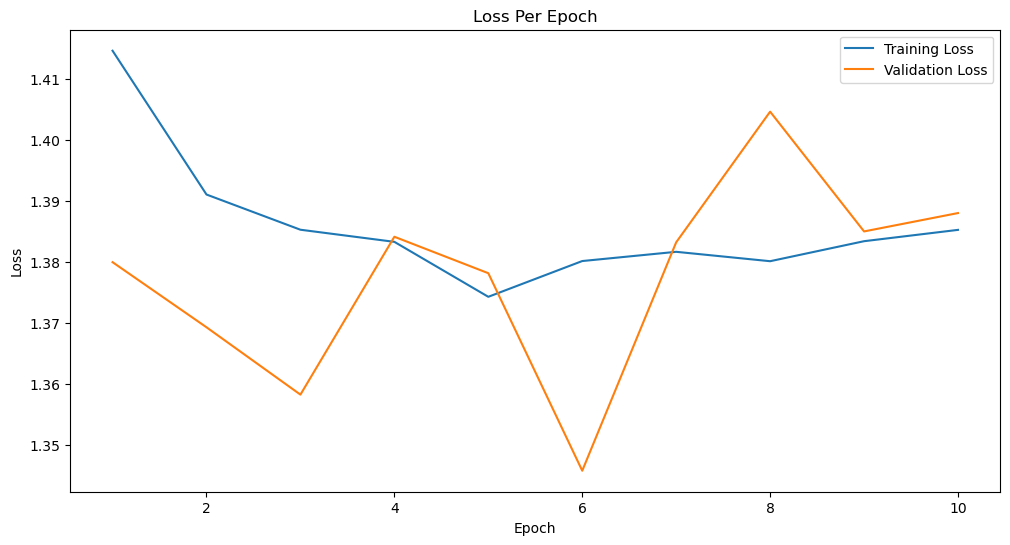

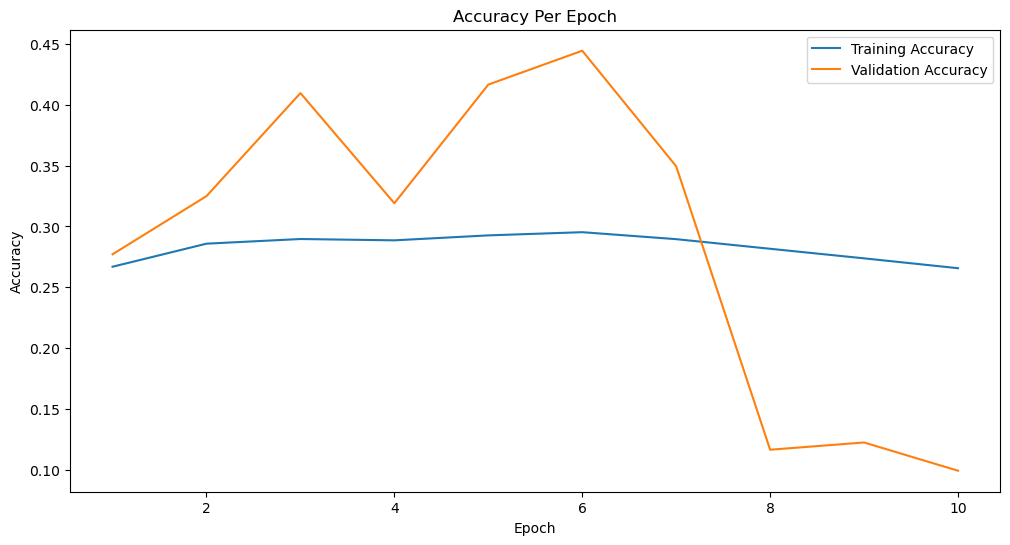

In [181]:

# Initialize parameters
params = initialize_parameters()

# Train the model
train(X_train_unflattened, y_train_undersampled, X_val_unflattened, y_val,params, epochs=10, learning_rate=0.01)


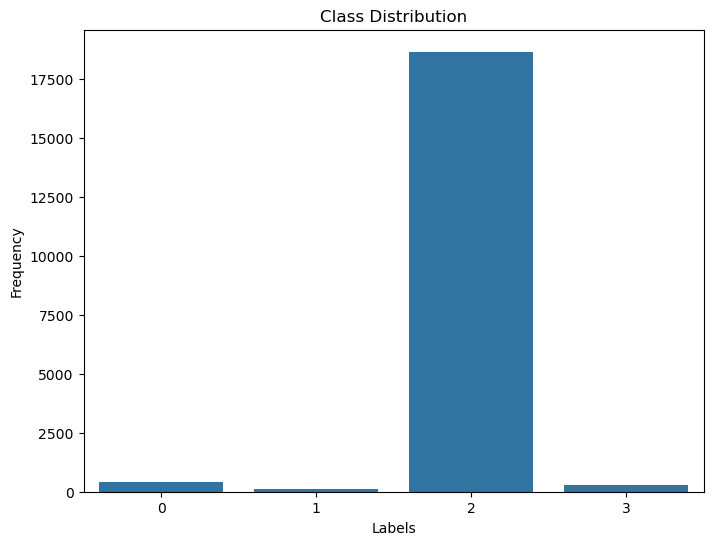

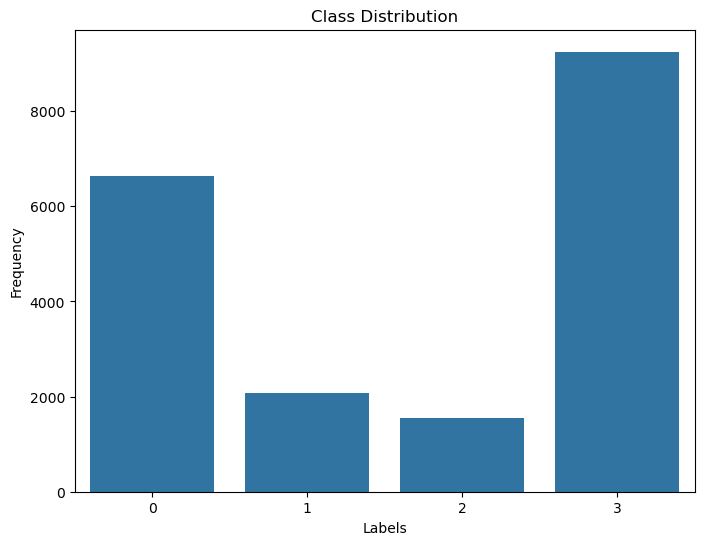

In [182]:
# Verifying if any specific class was overtrained
## Model has a tendency to overpredict class 1

plot_class_distribution(predict(X_val_unflattened,params))
plot_class_distribution(y_val)

# Download the test predictions

In [ ]:
y_test_data = predict(X_test_data, params)
plot_class_distribution(y_test_data)


In [ ]:
import numpy as np
import pandas as pd
import pickle

# Create a DataFrame for the output


def save_y_csv(y):

    submission_data = pd.DataFrame({
        "ID": np.arange(1, len(y) + 1),  # IDs start from 1
        "Class": y
    })
    # Save to CSV
    output_filename = "submission2.csv"
    submission_data.to_csv(output_filename, index=False)
    
    print(f"Submission file saved as {output_filename}")


In [ ]:
y = y_test_data
save_y_csv(y)

In [ ]:
y.shape